# Analyzing Gun Deaths in the United States (2012–2014)










The study analyzes gun deaths in the United States of America between 2012 and 2014

This report will try to answer the following questions.

* What is the number of annual suicide gun deaths in the United State from 2012 to  2014.
* What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?
* What is the annual number of gun deaths in the United States on average from 2012 to 2014, by cause?
* What is the percentage per 100,000 people of annual gun deaths in the United States from 2012 to 2014, by cause?
* What is the percentage of annual suicide gun deaths in the United States from 2012 to 2014, by year?

## Data Gathering 

The data set for study comes from GitHub and can be accessed here:

https://github.com/fivethirtyeight/guns-data.git




### Importing modules and reading Data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

In [2]:
ds = pd.read_csv('full_data.csv', index_col = 0)

In [3]:
ds.head()

,year,month,intent,police,sex,age,race,hispanic,place,education
1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,BA+
2,2012,1,Suicide,0,F,21.0,White,100,Street,Some college
3,2012,1,Suicide,0,M,60.0,White,100,Other specified,BA+
4,2012,2,Suicide,0,M,64.0,White,100,Home,BA+
5,2012,2,Suicide,0,M,31.0,White,100,Other specified,HS/GED


Organize dataset by year and month

In [4]:
dsGun = ds.sort_values(['year', 'month'])

## Data Analysis

Now let's look at the data and make some analysis.




### How many males and females are included in this study?

In [5]:
count = dsGun['sex'].value_counts()
s = count.sum()

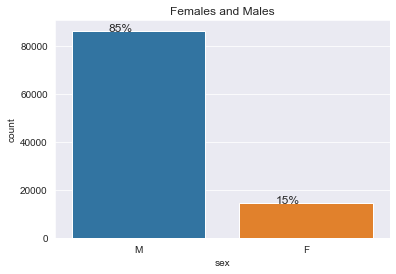

In [6]:
ax = sns.countplot(dsGun['sex'])
ax.set_title("Females and Males")
c = 0
for i in count:
    plt.text(-0.18+c,i,str(int((i/s)*100)+c)+'%',fontsize=12)
    c+=1
    

### How many educated females are included in this study?

As shown above, there are 14,243 educated females involved in this study.
Lets, Group the data set by gender.

In [7]:
data = dsGun[(dsGun['sex']=='F')]
data = data.groupby('sex').count()
data['education']

sex
F    14243
Name: education, dtype: int64

### What is the number of suicide gun deaths in the United States from 2012 to 2014, by gender?

In [8]:
data = dsGun[(dsGun['intent']=='Suicide')]
data = data.groupby('sex').count()
data.reset_index(inplace = True)

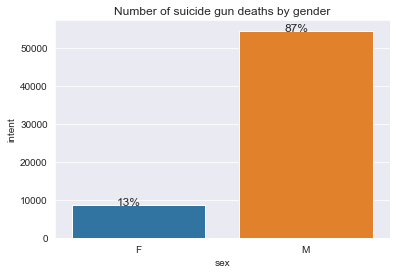

In [9]:
ax = sns.barplot(x='sex', y='intent', data=data)
ax.set_title('Number of suicide gun deaths by gender')
#percentage
tot = data['intent'].sum()
c=0
for i in data['intent']:
    plt.text(-0.13+c,i,str(int((i/tot)*100)+c)+'%',fontsize=12)
    c+=1

### What is the number of gun deaths by race in the United States per 100,000 people from 2012 to 2014?

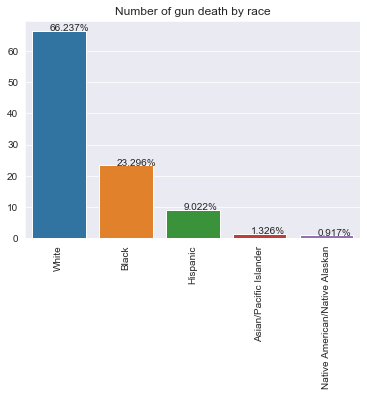

In [10]:
dsRace = dsGun['race'].value_counts()*100/100000
ax = sns.barplot(x=dsRace.index,y=dsRace.values)
ax.set_title('Number of gun death by race')
for item in ax.get_xticklabels():
    item.set_rotation(90)
    

c=0
for i in dsRace.values:
    ax.text(c-0.13, i+0.1, str(i)+'%',fontsize=10)
    c=c+1

### What is the percentage of gun deaths in the United States on average from 2012 to 2014, by cause?

Number of deaths in the United state

In [11]:
cause = dsGun['intent'].value_counts()
cause

Suicide         63175
Homicide        35176
Accidental       1639
Undetermined      807
Name: intent, dtype: int64

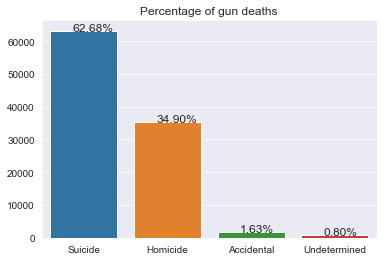

In [12]:

ax = sns.barplot(x=cause.index, y=cause.values)
ax.set_title('Percentage of gun deaths')
c=0
for i in cause.values:
    plt.text(-0.13+c,i,('{:.2f}%'.format(((i)/cause.sum()*100))),fontsize=12)
    c+=1



### What is the percentage of suicide gun deaths in the United States from 2012 to 2014, by year?

In [13]:
data = dsGun[(dsGun['intent']=='Suicide')]
death = data.groupby('year')['intent'].count()

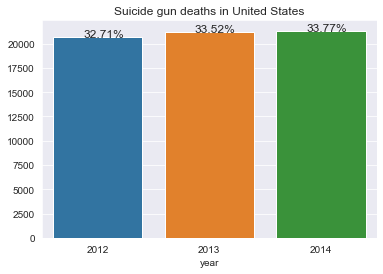

In [14]:
ax = sns.barplot(x=death.index, y=death.values)
c=0
ax.set_title('Suicide gun deaths in United States')
for i in death.values:
    plt.text(-0.13+c,i,('{:.2f}%'.format(((i)/death.sum()*100))),fontsize=12)
    c+=1

## Conclusion

* There are huge differences between males and females. The number of male suicides by gun is **above 50,000**, while the female death rate is **below 10,000**, which shows how males are more likely to commit suicide using a gun.
* The highest death rate was for white people, then black, and then Hispanic. There are a few other races listed, but the rates are small comparatively.
* Almost the **same number** of suicides each year over **three years**.
 